In [1]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    """Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))


def der_sigmoid(y):
    """First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)

def relu(x):
    return np.maximum(0, x)

def der_relu(x):
    return np.where(x > 0, 1, 0)


class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, (x > y).astype(np.int64).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_chessboard(n=100):
        """Data generation (Chessboard)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, ((x < 0.25) ^ (x > 0.5) ^ (x > 0.75) ^ (y < 0.25) ^ (y > 0.5) ^ (y > 0.75)).astype(np.int64).reshape(
            (-1, 1)
        )

    @staticmethod
    def fetch_data(mode, n):
        """Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == "Linear" or mode == "XOR" or mode == "Chessboard"

        data_gen_func = {"Linear": GenData._gen_linear, "XOR": GenData._gen_xor, "Chessboard": GenData._gen_chessboard}[mode]

        return data_gen_func(n)


class SimpleNet:
    def __init__(self, num_step=6000, learning_rate=0.01, step_decay_interval=500, decay_rate=0.5):  # don't change print_interval
        """A hand-crafted implementation of simple network.

        Args:
            num_step (optional):    the total number of training steps.
            print_interval (optional):  the number of steps between each reported number.
        """
        self.num_step = num_step
        self.print_interval = 100
        self.learning_rate = learning_rate
        self.step_decay_interval = step_decay_interval
        self.decay_rate = decay_rate

        self.hidden1_weights = np.random.randn(2, 100) * np.sqrt(1 / 2)
        self.hidden1_bias = np.zeros((1, 100))
        self.hidden2_weights = np.random.randn(100, 50) * np.sqrt(1 / 100)
        self.hidden2_bias = np.zeros((1, 50))
        self.hidden3_weights = np.random.randn(50, 10) * np.sqrt(1 / 50)
        self.hidden3_bias = np.zeros((1, 10))
        self.output_weights = np.random.randn(10, 1) * np.sqrt(1 / 10)
        self.output_bias = np.zeros((1, 1)) 

    def adjust_learning_rate(self, epoch):
        if epoch > 0 and epoch % self.step_decay_interval == 0:
            self.learning_rate *= self.decay_rate

    @staticmethod
    def plot_result(data, gt_y, pred_y):
        """Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        assert data.shape[0] == gt_y.shape[0] == pred_y.shape[0], f"{data.shape}, {gt_y.shape}, {pred_y.shape}"

        plt.figure(figsize=(11, 5))

        plt.subplot(121)
        plt.title("Ground Truth", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=gt_y[:,0], cmap=plt.cm.bwr)

        plt.subplot(122)
        plt.title("Prediction", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=pred_y[:,0], cmap=plt.cm.bwr)

        plt.show()

    def forward(self, inputs):
        """Implementation of the forward pass.
        It should accepts the inputs and passing them through the network and return results.
        """
        """ FILL IN HERE """
        self.inputs = inputs
        self.Z1 = np.dot(inputs, self.hidden1_weights) + self.hidden1_bias
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.hidden2_weights) + self.hidden2_bias
        self.A2 = relu(self.Z2)
        self.Z3 = np.dot(self.A2, self.hidden3_weights) + self.hidden3_bias
        self.A3 = relu(self.Z3)
        self.Z4 = np.dot(self.A3, self.output_weights) + self.output_bias
        self.A4 = sigmoid(self.Z4)
        return self.A4

    def backward(self):
        """Implementation of the backward pass.
        It should utilize the saved loss to compute gradients and update the network all the way to the front.
        """
        """ FILL IN HERE """
        m = self.inputs.shape[0]
        
        # 計算每一層的誤差
        dZ4 = self.error
        dW4 = np.dot(self.A3.T, dZ4) / m
        db4 = np.sum(dZ4, axis=0, keepdims=True) / m
        
        dZ3 = np.dot(dZ4, self.output_weights.T) * der_relu(self.A3)
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m
        
        dZ2 = np.dot(dZ3, self.hidden3_weights.T) * der_relu(self.A2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        dZ1 = np.dot(dZ2, self.hidden2_weights.T) * der_relu(self.A1)
        dW1 = np.dot(self.inputs.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # 更新參數
        self.hidden1_weights -= self.learning_rate * dW1
        self.hidden1_bias -= self.learning_rate * db1
        self.hidden2_weights -= self.learning_rate * dW2
        self.hidden2_bias -= self.learning_rate * db2
        self.hidden3_weights -= self.learning_rate * dW3
        self.hidden3_bias -= self.learning_rate * db3
        self.output_weights -= self.learning_rate * dW4
        self.output_bias -= self.learning_rate * db4


    def train(self, inputs, labels, batch_size=32):
        """The training routine that runs and update the model.

        Args:
            inputs: the training (and testing) data used in the model.
            labels: the ground truth of correspond to input data.
        """
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epoch in range(self.num_step):
            self.adjust_learning_rate(epoch)

            indices = np.arange(n)
            np.random.shuffle(indices)
            inputs = inputs[indices]
            labels = labels[indices]

            for start_idx in range(0, n, batch_size):
                end_idx = min(start_idx + batch_size, n)
                batch_inputs = inputs[start_idx:end_idx]
                batch_labels = labels[start_idx:end_idx]
                self.output = self.forward(batch_inputs)
                self.error = self.output - batch_labels

                # self.output = self.forward(inputs[idx : idx + 1, :])
                # self.error = self.output - labels[idx : idx + 1, :]
                self.backward()

            if epoch % self.print_interval == 0:
                print("Epochs {}: ".format(epoch), end="")
                self.test(inputs, labels)

        print("Training finished")
        self.test(inputs, labels)

    def test(self, inputs, labels):
        """The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx : idx + 1, :])
            prediction = np.round(result)
            error += abs(prediction - labels[idx : idx + 1, :])

        error /= n

        """ Print or plot your results in your preferred forms"""
        print("accuracy: %.2f" % ((1 - error) * 100) + "%")

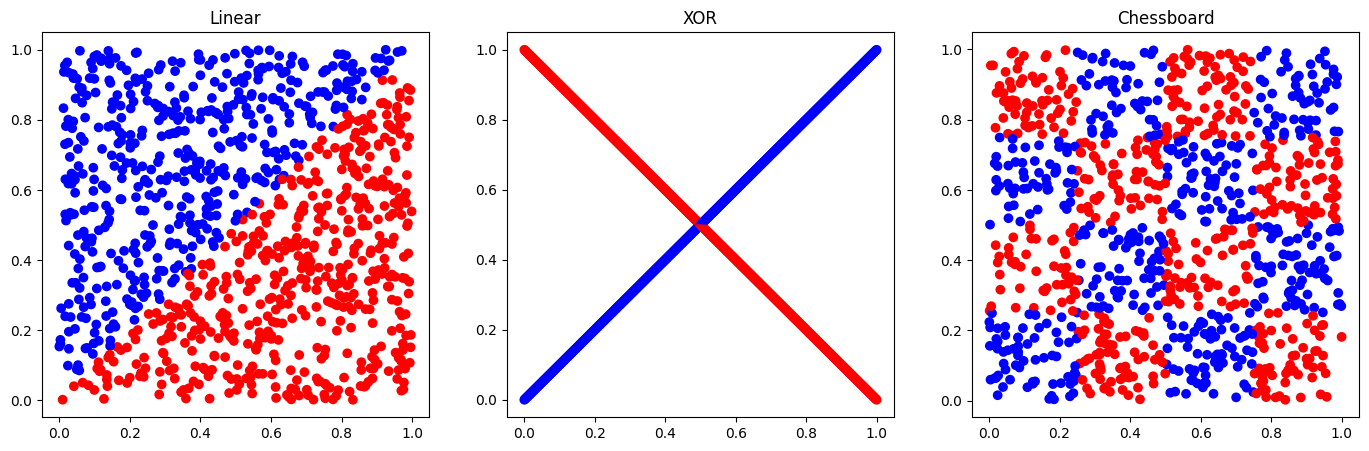

In [2]:
plt.figure(figsize=(17, 5))
for i, name in enumerate(['Linear', 'XOR', 'Chessboard']):
    data, label = GenData.fetch_data(name, 1000)
    plt.subplot(1,3,i+1)
    plt.scatter(data[:, 0], data[:, 1], c=label[:, 0], cmap=plt.cm.bwr)
    plt.title(name)

### Run "Linear"

Epochs 0: accuracy: 94.30%


C:\Users\wei\AppData\Local\Temp\ipykernel_30940\3452667854.py:266: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("accuracy: %.2f" % ((1 - error) * 100) + "%")


Epochs 100: accuracy: 98.60%
Epochs 200: accuracy: 98.60%
Epochs 300: accuracy: 99.50%
Epochs 400: accuracy: 98.40%
Training finished
accuracy: 99.80%


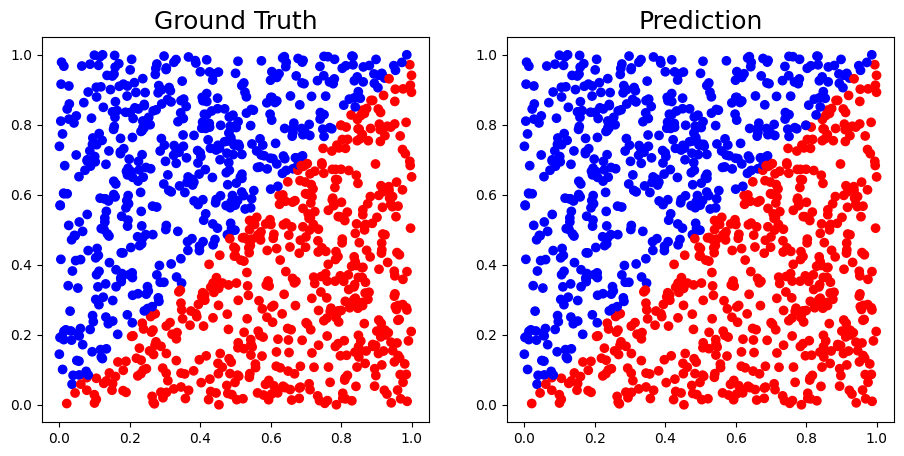

In [3]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Linear", 1000)

net = SimpleNet(500)
net.train(data, label, 8)

pred_result = np.round(net.forward(data))

SimpleNet.plot_result(data, label, pred_result)

### Run "XOR"

Epochs 0: accuracy: 59.70%


C:\Users\wei\AppData\Local\Temp\ipykernel_30940\3452667854.py:266: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("accuracy: %.2f" % ((1 - error) * 100) + "%")


Epochs 100: accuracy: 95.70%
Epochs 200: accuracy: 97.40%
Epochs 300: accuracy: 98.20%
Epochs 400: accuracy: 98.80%
Epochs 500: accuracy: 99.00%
Epochs 600: accuracy: 99.00%
Epochs 700: accuracy: 99.20%
Epochs 800: accuracy: 99.30%
Epochs 900: accuracy: 99.20%
Training finished
accuracy: 99.40%


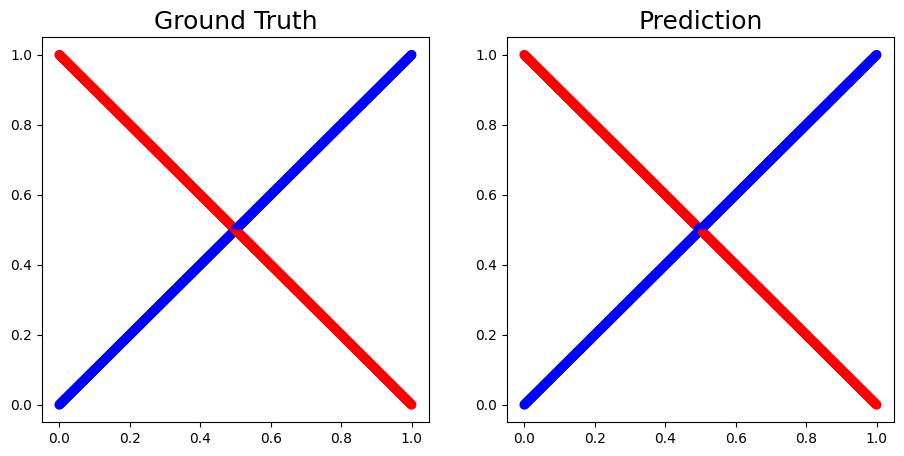

In [4]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("XOR", 1000)

net = SimpleNet(1000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

### Run "Chessboard"

Epochs 0: accuracy: 51.16%


C:\Users\wei\AppData\Local\Temp\ipykernel_30940\3452667854.py:266: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("accuracy: %.2f" % ((1 - error) * 100) + "%")


Epochs 100: accuracy: 70.54%
Epochs 200: accuracy: 79.36%
Epochs 300: accuracy: 84.12%
Epochs 400: accuracy: 87.52%
Epochs 500: accuracy: 96.56%
Epochs 600: accuracy: 93.54%
Epochs 700: accuracy: 94.02%
Epochs 800: accuracy: 95.54%
Epochs 900: accuracy: 98.52%
Epochs 1000: accuracy: 98.90%
Epochs 1100: accuracy: 97.24%
Epochs 1200: accuracy: 99.06%
Epochs 1300: accuracy: 99.20%
Epochs 1400: accuracy: 99.34%
Epochs 1500: accuracy: 99.04%
Epochs 1600: accuracy: 99.48%
Epochs 1700: accuracy: 99.70%
Epochs 1800: accuracy: 99.10%
Epochs 1900: accuracy: 99.66%
Training finished
accuracy: 99.48%


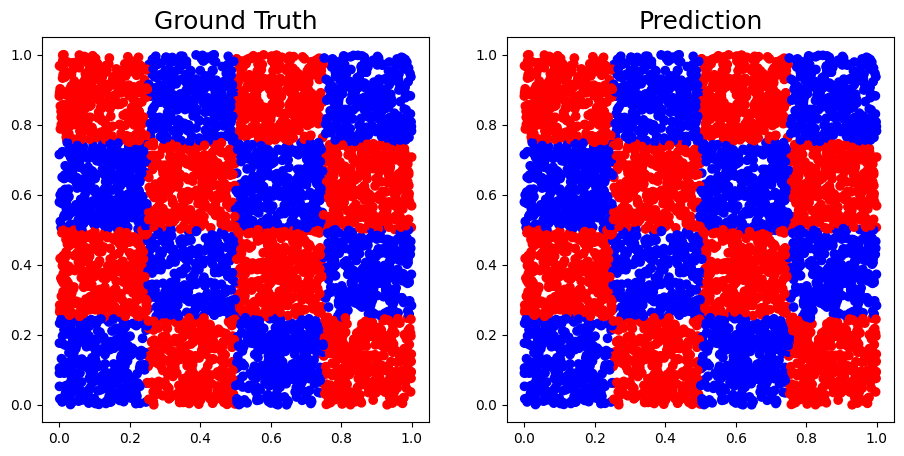

In [5]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Chessboard", 5000)

net = SimpleNet(2000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)